### Clusteranalyse der BVG-Pressemitteilungen

In diesem Notebook erfolgt eine thematische Clusteranalyse auf Basis der bereinigten Wortfrequenzen aus den Pressemitteilungen der BVG.  
Ziel ist es, über gruppierte Begriffe zentrale Themenfelder und Entwicklungen in der öffentlichen Kommunikation der BVG sichtbar zu machen.

Es werden drei unterschiedliche Clusteransätze verwendet:
- Top-down-Ansatz: Die Begriffe wurden aus der Rubrik „Unternehmen“ auf der offiziellen BVG-Website abgeleitet. Dort benannte Werte und strategische Ziele bilden die Grundlage für die thematische Zuordnung.
- Bottom-up-Ansatz: Die häufigsten Begriffe der Top-50-Wortfrequenzliste wurden explorativ zu inhaltlich sinnvollen Clustern zusammengefasst.
- Inside-out-Ansatz: Die Begriffe wurden aus den Geschäftsberichten der BVG von 2021 bis 2024 extrahiert und zeigen, welche Themen das Unternehmen in seiner Eigenkommunikation betont.

Visualisiert und untersucht werden:
- Die Gesamthäufigkeit der Cluster über alle Jahre
- Die Entwicklung der Cluster im Zeitverlauf (2021–2025)
- Die jährliche Entwicklung ausgewählter Begriffe innerhalb der Cluster

#### 1. Import benötigte Pakete

In [81]:
# Standard
import os
import pandas as pd

# Eigene Funktionen (ausgelagert)
import sys  # Systemfunktionen 
sys.path.append("..") # Pfad zu .py Datei
# Funktionen aus clusteranalyse.py importieren
from scripts.clusteranalyse import (
    cluster_trend_table, 
    cluster_trend_plot, 
    cluster_totals, 
    plot_cluster_totals, 
    plot_cluster_by_year, 
    cluster_totals_by_year
)

In [82]:
# Pfade
# Projektverzeichnis 
PROJECT_ROOT = r"D:/DBU/ADSC11 ADS-01/Studienarbeit/newspaper-scraping"

# Eingabedaten: CSV-Datei mit bereinigten Pressetexten
DATAPATH = os.path.join(PROJECT_ROOT, "output", "pm_bvg_clean_final.csv")

# Output 
OUTPUT_PATH = os.path.join(PROJECT_ROOT, "output")

#### 2. Datenexploration

In [83]:
# CSV-Datei einlesen 
df_bvg_clean = pd.read_csv(DATAPATH)

In [84]:
# Überblick df_pm
df_bvg_clean.head()

,count,word,file_name,source,date
0,8,biesdorf,13-points-go-to.html,bvg_pm,2021-08-06
1,4,berliner,13-points-go-to.html,bvg_pm,2021-08-06
2,3,mobilität,13-points-go-to.html,bvg_pm,2021-08-06
3,3,berlin,13-points-go-to.html,bvg_pm,2021-08-06
4,2,sharingangebote,13-points-go-to.html,bvg_pm,2021-08-06


In [85]:
# Anzahl Zeilen und Spalten
df_bvg_clean.shape

(50133, 5)

In [86]:
# Fehlende Werte 
df_bvg_clean.isna().sum()

count        0
word         0
file_name    0
source       0
date         0
dtype: int64

#### 3. Analyse der Wortverwendung in Pressemitteilungen

In [87]:
# Vorbereitung: neue Spalte year
df_bvg_clean["year"] = pd.to_datetime(df_bvg_clean["date"]).dt.year

In [88]:
# Prüfung
df_bvg_clean.columns

Index(['count', 'word', 'file_name', 'source', 'date', 'year'], dtype='object')

##### 3.1 Top-down-Ansatz: Themen basierend auf der BVG-Selbstdarstellung

In [89]:
# Cluster und Begriffe definieren
clusters_topdown = {
    "Mobilität & Infrastruktur": ["verkehr", "nahverkehr", "linie", "netz", "ausbau", "vernetzung", "mobilitätswende", "mobilität", "pünktlichkeit", "verlässlichkeit", "flexibel"],
    "Digitalisierung": ["innovation", "zukunft", "digital", "app", "technologie"],
    "Ökologie & Nachhaltigkeit": ["klimaschutz", "umwelt", "nachhaltigkeit", "co2", "ökologisch"],
    "Barrierefreiheit & Inklusion": ["barrierefrei", "aufzug", "inklusion", "vielfalt"],
    "Diversität & Verantwortung": ["vielfalt", "diversität", "wertschätzung", "gesellschaft", "verantwortung"],
    "Mitarbeitende & Arbeitgeberin": ["mitarbeitende", "beschäftigte", "zufriedenheit", "motivation"]
}

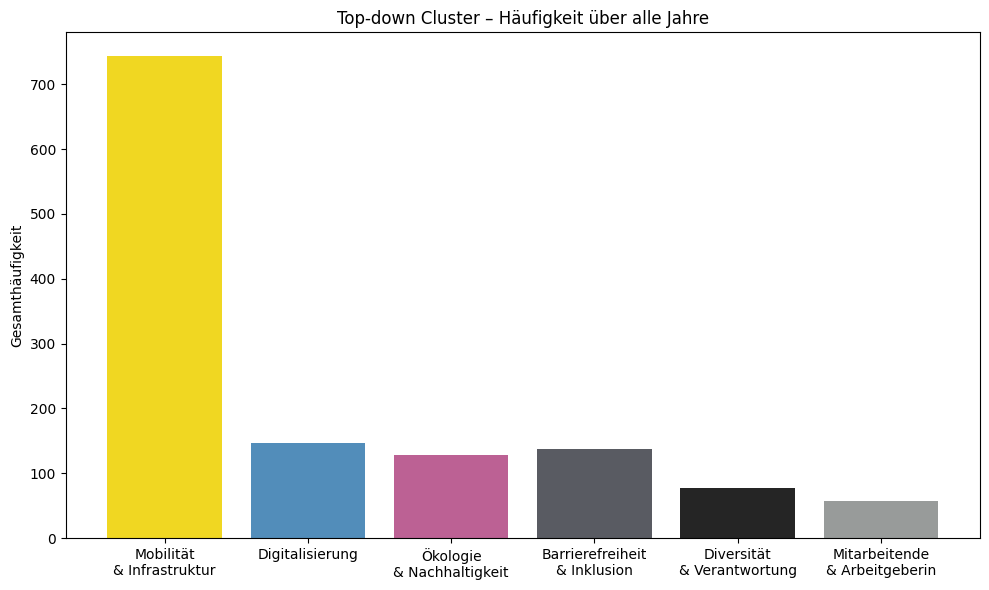

In [90]:
# Überblick: Häufigkeit je Cluster über alle Jahre (ausgelagerte Funktion)
cluster_summaries = cluster_totals(df_bvg_clean, clusters_topdown)

# Plott: Häufigkeit je Cluster über alle Jahre (ausgelagerte Funktion)
# Vorbereitung
# Farbzuordnung
cluster_color_map = {
    "Mobilität & Infrastruktur": "#F0D722",
    "Digitalisierung": "#528DBA",
    "Ökologie & Nachhaltigkeit": "#BC6194",
    "Barrierefreiheit & Inklusion": "#595B62",
    "Diversität & Verantwortung": "#252525",
    "Mitarbeitende & Arbeitgeberin": "#989B9A"
}

plot_cluster_totals(
    cluster_summaries,
    title="Top-down Cluster – Häufigkeit über alle Jahre",
    color_palette=cluster_color_map    
)

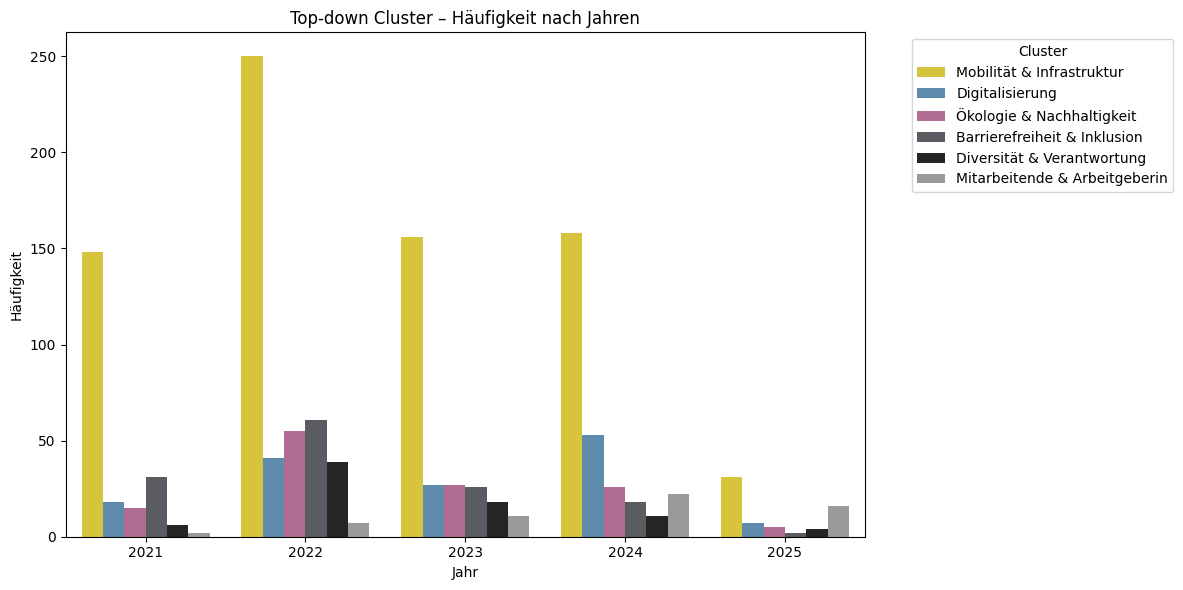

In [91]:
# Entwicklung: Häufigkeit je Cluster über die Jahre (ausgelagerte Funktion)
# Häufigkeit nach Jahr
cluster_by_year_df = cluster_totals_by_year(df_bvg_clean, clusters_topdown)

# Plot    
plot_cluster_by_year(cluster_by_year_df, 
                     title="Top-down Cluster – Häufigkeit nach Jahren",
                     color_palette=cluster_color_map)

In [92]:
# Entwicklung: Clustertrends über die Jahre 
# Tabellenansicht: Ausgewählte Wörter, gruppiert nach Jahr und Cluster (ausgelagerte Funktion)
cluster_trend_table(df_bvg_clean, clusters_topdown, label="Top-down")


Top-down – Begriffsentwicklung im Cluster: Mobilität & Infrastruktur
word  ausbau  flexibel  linie  mobilität  mobilitätswende  nahverkehr  netz  \
year                                                                          
2021       3         0     97         10                2           7    12   
2022       6         2    117         51               16          24     9   
2023      15         0     47         42                7          12    14   
2024      12         1     32         49                9           9    22   
2025       0         0      6         13                0           6     0   

word  pünktlichkeit  verkehr  verlässlichkeit  vernetzung  
year                                                       
2021              1       16                0           0  
2022              1       19                0           5  
2023              0       11                5           3  
2024              0       18                6           0  
2025            

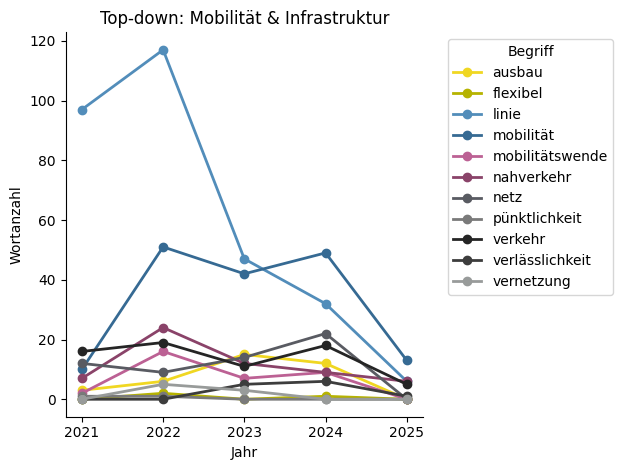

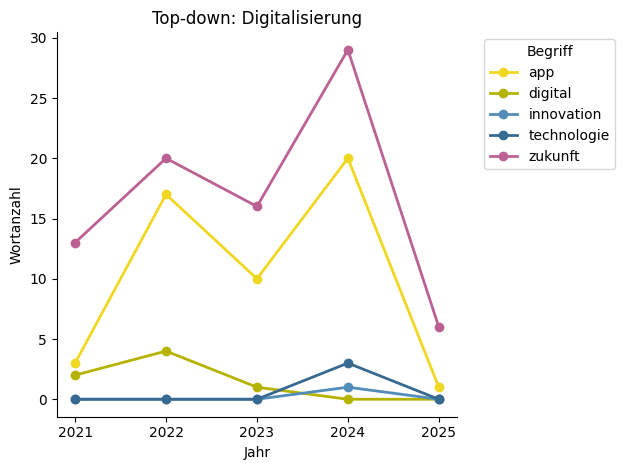

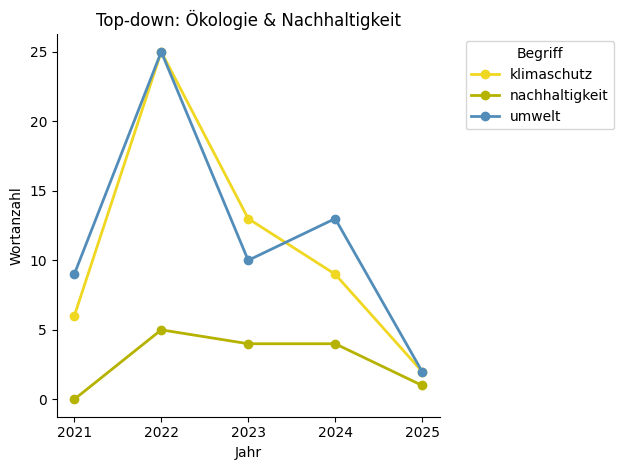

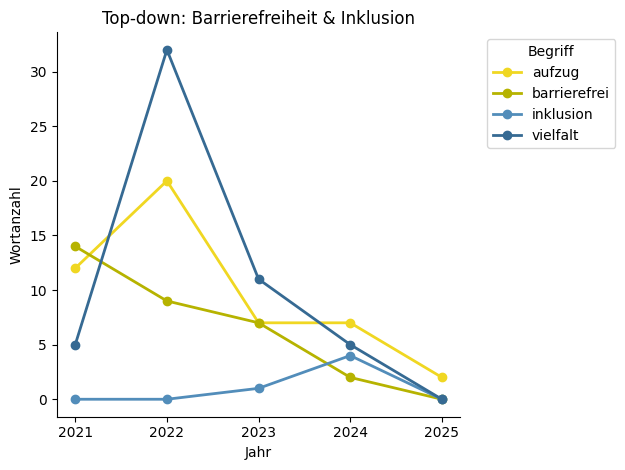

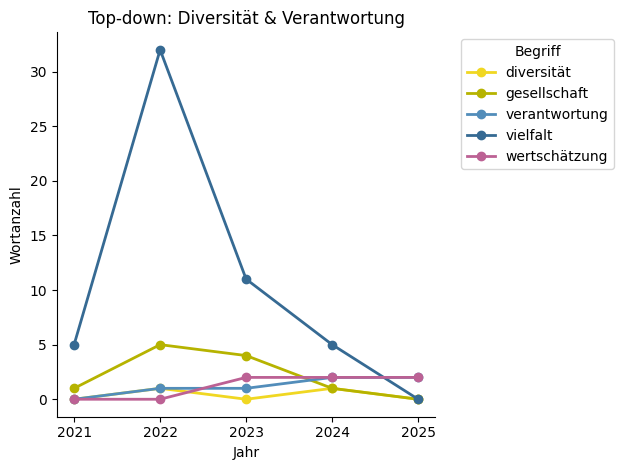

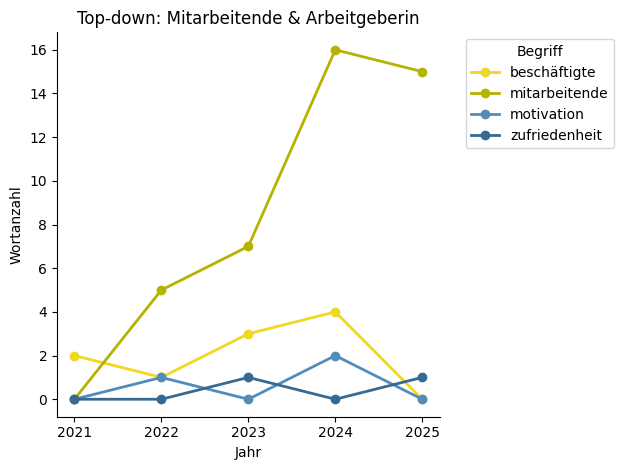

In [93]:
# Entwicklung: Clustertrends über die Jahre 
# Plott: Ausgewählte Wörter, gruppiert nach Jahr und Cluster (ausgelagerte Funktion)
cluster_trend_plot(df_bvg_clean, clusters_topdown, label="Top-down")

##### 3.2 Bottom-up-Ansatz: Explorativ gebildete Themencluster

In [94]:
# Cluster und Begriffe definieren
clusters_bottomup = {
    "Mobilität & Infrastruktur": ["bauarbeiten", "haltestelle", "einsatz", "bahnhof", "fahren", "fahrzeuge", "betriebshof", "ersatzverkehr", "betrieb", "sicherheit", "netz"],
    "Arbeitskonflikte": ["verdi", "gewerkschaft", "tarif", "verhandlungsrunde", "tarifrunde", "schlichtung", "einigung"], 
    "Verkehrsmittel": ["bus", "busse", "u-bahn", "zug", "straßenbahn", "straßenbahnen"],
    "Service & Kundennähe": ["kunden", "angebot", "ersatzverkehr", "fahrgäste"],
    "Produkte & Angebote": ["deutschlandticket", "berlkönig", "jelbi", "muva"]
}

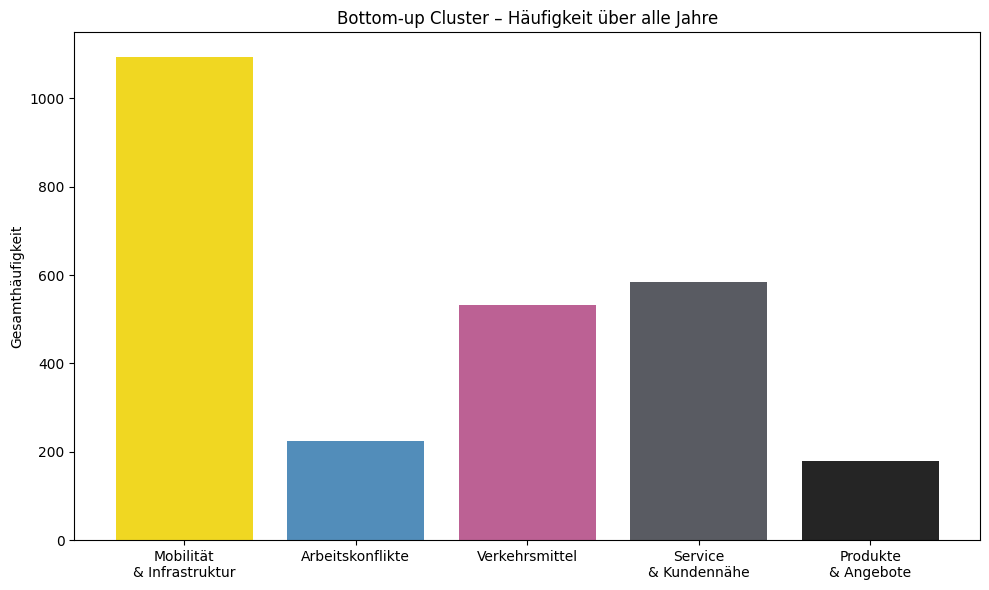

In [95]:
# Überblick: Häufigkeit je Cluster über alle Jahre (ausgelagerte Funktion)
cluster_summaries = cluster_totals(df_bvg_clean, clusters_bottomup)

# Plott: Häufigkeit je Cluster über alle Jahre (ausgelagerte Funktion)
# Vorbereitung
# Farbzuordnung
cluster_color_map = {
    "Mobilität & Infrastruktur": "#F0D722",
    "Arbeitskonflikte": "#528DBA",
    "Verkehrsmittel": "#BC6194",
    "Service & Kundennähe": "#595B62",
    "Produkte & Angebote": "#252525"
}

plot_cluster_totals(
    cluster_summaries,
    title="Bottom-up Cluster – Häufigkeit über alle Jahre",
    color_palette=cluster_color_map)  

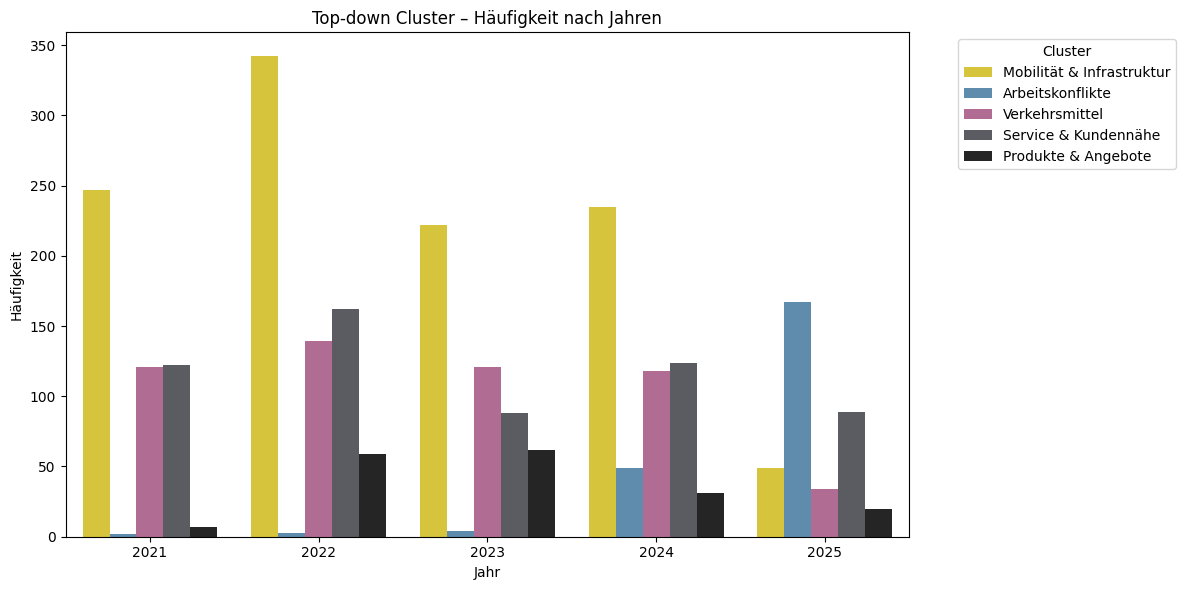

In [96]:
# Entwicklung: Häufigkeit je Cluster über die Jahre (ausgelagerte Funktion)
# Häufigkeit nach Jahr
cluster_by_year_df = cluster_totals_by_year(df_bvg_clean, clusters_bottomup)

# Plot    
plot_cluster_by_year(cluster_by_year_df, 
                     title="Top-down Cluster – Häufigkeit nach Jahren",
                     color_palette=cluster_color_map)

In [97]:
# Entwicklung: Clustertrends über die Jahre 
# Alle Wörter, gruppiert nach Jahr
top_words_by_year = (
    df_bvg_clean.groupby(["year", "word"])["count"]
    .sum()
    .reset_index()
)

# Schleife: Pro Jahr Top 50 Wörter ausgeben
top_n = 50
for year in sorted(top_words_by_year["year"].dropna().unique()):
    print(f"\nTop {top_n} Wörter im Jahr {int(year)}:")
    top_words = (
        top_words_by_year[top_words_by_year["year"] == year]
        .sort_values("count", ascending=False)
        .head(top_n)
    )
    print(top_words[["word", "count"]].to_string(index=False))


Top 50 Wörter im Jahr 2021:
            word  count
             bvg    215
        berliner    116
             uhr    113
           linie     97
          straße     90
          berlin     84
       fahrgäste     73
        ubahnhof     67
verkehrsbetriebe     53
          werden     50
     straßenbahn     49
          bussen     46
          linien     44
           fährt     44
           stadt     40
         einsatz     39
          fahren     37
   ersatzverkehr     35
           busse     34
         bereich     33
       unterwegs     33
           allee     32
           meter     30
            euro     29
            jahr     28
            zeit     27
         betrieb     27
       fahrzeuge     27
           platz     26
          jahren     25
   informationen     25
            züge     25
        sbahnhof     24
    hauptbahnhof     24
         gewohnt     24
         bahnhof     23
             bus     23
        menschen     22
         jeweils     22
       verf

In [98]:
# Tabellenansicht: Ausgewählte Wörter, gruppiert nach Jahr und Cluster (ausgelagerte Funktion)
cluster_trend_table(df_bvg_clean, clusters_bottomup, label="Bottom-up")


Bottom-up – Begriffsentwicklung im Cluster: Mobilität & Infrastruktur
word  bahnhof  bauarbeiten  betrieb  betriebshof  einsatz  ersatzverkehr  \
year                                                                       
2021       23            6       27           16       39             35   
2022       40           13       31           16       49             51   
2023       16            7       23           17       35             17   
2024       25            1       31            4       50              0   
2025        7            0       17            3        8              0   

word  fahren  fahrzeuge  haltestelle  netz  sicherheit  
year                                                    
2021      37         27           18    12           7  
2022      81         35            9     9           8  
2023      45         30            6    14          12  
2024      29         44            6    22          23  
2025       5          4            0     0           5

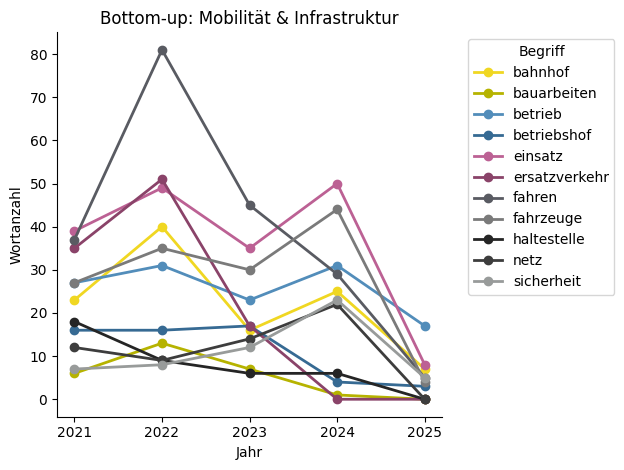

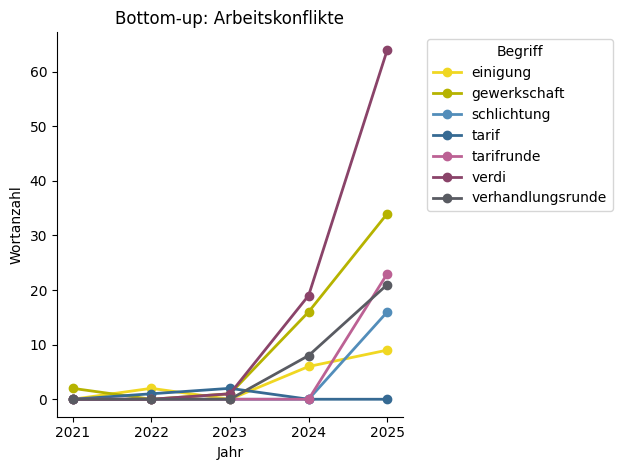

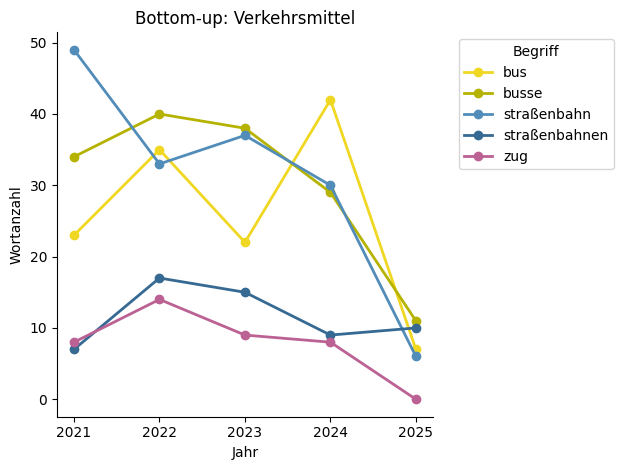

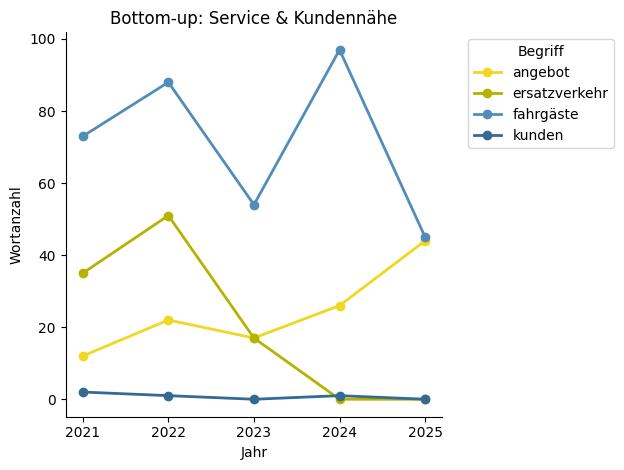

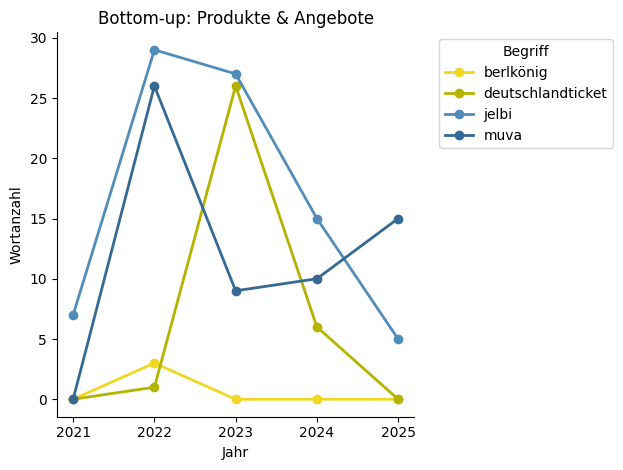

In [99]:
# Entwicklung: Clustertrends über die Jahre 
# Plott: Ausgewählte Wörter, gruppiert nach Jahr und Cluster (ausgelagerte Funktion)
cluster_trend_plot(df_bvg_clean, clusters_bottomup, label="Bottom-up")

##### 3.3 Inside-out-Ansatz: Themen aus den Geschäftsberichten der BVG

In [100]:
# Cluster und Begriffe definieren
clusters_insideout = {
    "Mobilität & Infrastruktur": ["verlängerung", "zuverlässigkeit", "u-bahn-fuhrpark", "dammsanierung", "werkstatthalle", "ausbau", "expressmetropole", "werkstattkonzept"],
    "Digitalisierung": ["sap s/4 hana", "ptnova", "cbtc", "recruiting tool", "herzstück", "app"],
    "Ökologie & Nachhaltigkeit": ["lieferketten", "dekarbonisierung", "nachhaltigkeit", "elektrobus", "ökostrom", "e-busse", "ladeinfrastruktur"],
    "Mitarbeitende & Arbeitgeberin": ["job-store", "mitarbeitendenvollbefragung", "einigung", "arbeitgeber-kampagne", "fachkräftemangel", "arbeitskräftemangel", "strategie", 
        "stabilität vor wachstum", "stabilitätskonzept", "vielfalt", "sitzmuster"],
    "Service & Kundennähe": ["sauberkeit", "reinigungsstreife", "berlin-abo", "bargeld", "ticket-app", "fahrinfo", "infosäule", "diggi"],
    "Produkte & Angebote": ["deutschlandticket", "jelbi", "urbanliner", "muva", "on-demand", "sharing", "mobilitätsplattform"]
}

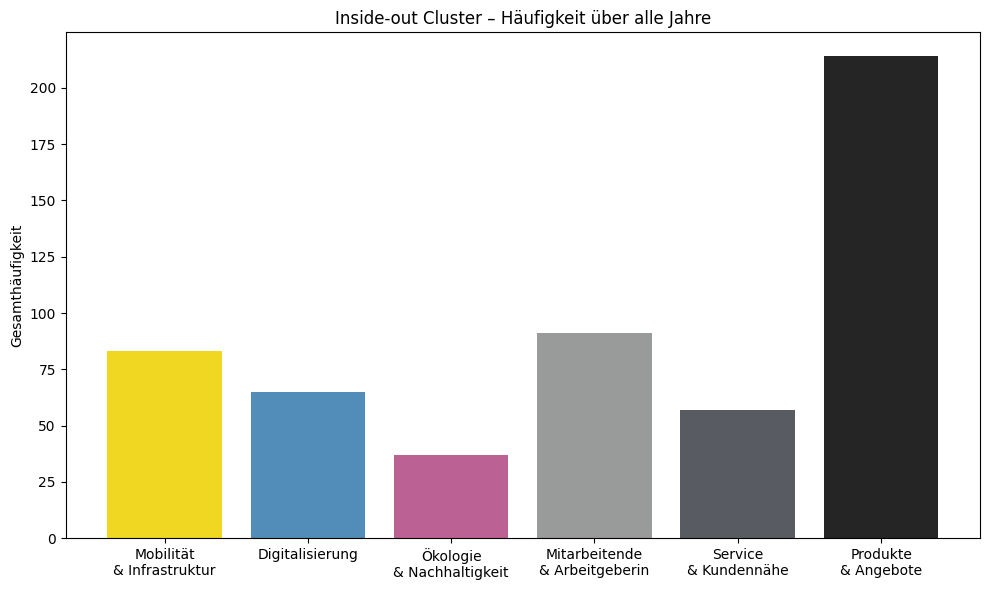

In [101]:
# Überblick: Häufigkeit je Cluster über alle Jahre (ausgelagerte Funktion)
cluster_summaries = cluster_totals(df_bvg_clean, clusters_insideout)

# Plott: Häufigkeit je Cluster über alle Jahre (ausgelagerte Funktion)
# Vorbereitung
# Farbzuordnung
cluster_color_map = {
    "Mobilität & Infrastruktur":"#F0D722",
    "Digitalisierung": "#528DBA",
    "Ökologie & Nachhaltigkeit": "#BC6194",
    "Mitarbeitende & Arbeitgeberin": "#989B9A",
    "Service & Kundennähe": "#595B62",
    "Produkte & Angebote": "#252525",
    "Service & Kundennähe": "#595B62"
}

plot_cluster_totals(
    cluster_summaries,
    title="Inside-out Cluster – Häufigkeit über alle Jahre",
    color_palette=cluster_color_map)  

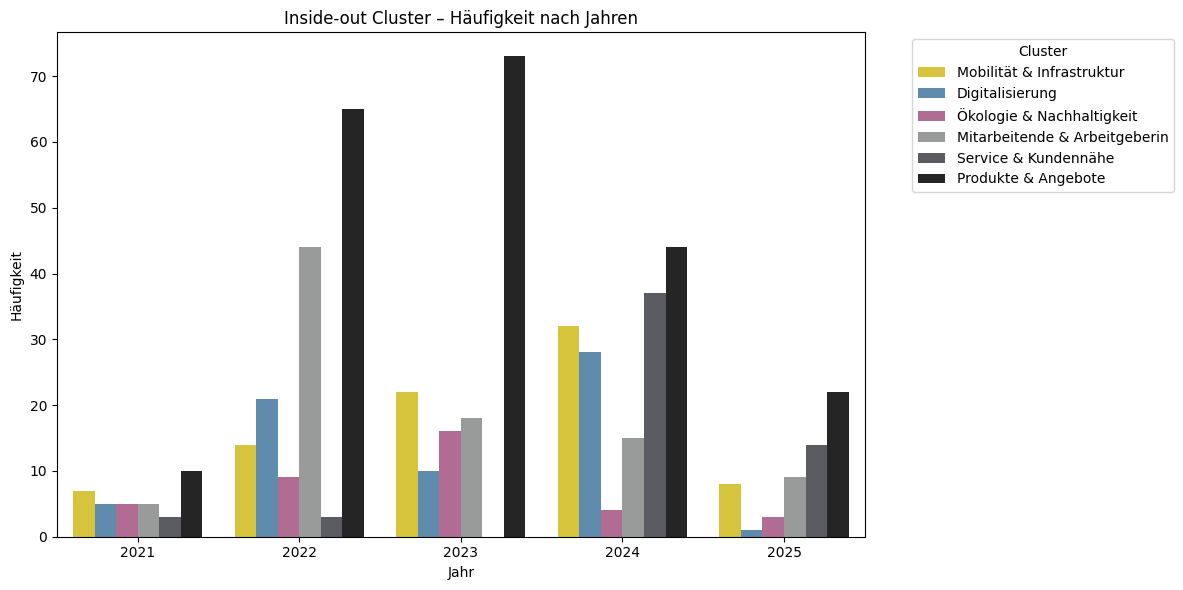

In [102]:
# Entwicklung: Häufigkeit je Cluster über die Jahre (ausgelagerte Funktion)
# Häufigkeit nach Jahr
cluster_by_year_df = cluster_totals_by_year(df_bvg_clean, clusters_insideout)

# Plot    
plot_cluster_by_year(cluster_by_year_df, 
                     title="Inside-out Cluster – Häufigkeit nach Jahren",
                     color_palette=cluster_color_map)

In [103]:
# Entwicklung: Clustertrends über die Jahre 
# Tabellenansicht: Ausgewählte Wörter, gruppiert nach Jahr und Cluster (ausgelagerte Funktion)
cluster_trend_table(df_bvg_clean, clusters_insideout, label="Inside-out")


Inside-out – Begriffsentwicklung im Cluster: Mobilität & Infrastruktur
word  ausbau  expressmetropole  verlängerung  zuverlässigkeit
year                                                         
2021       3                 0             3                1
2022       6                 0             5                3
2023      15                 2             4                1
2024      12                 5             7                8
2025       0                 0             6                2

Inside-out – Begriffsentwicklung im Cluster: Digitalisierung
word  app  cbtc  herzstück
year                      
2021    3     0          2
2022   17     0          4
2023   10     0          0
2024   20     7          1
2025    1     0          0

Inside-out – Begriffsentwicklung im Cluster: Ökologie & Nachhaltigkeit
word  dekarbonisierung  elektrobus  ladeinfrastruktur  lieferketten  \
year                                                                  
2021                 2       

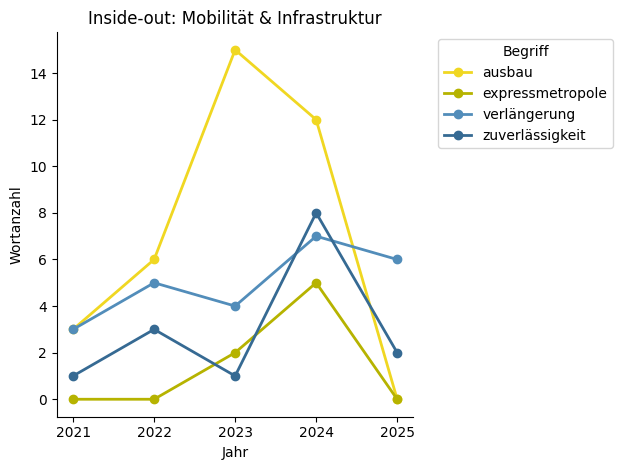

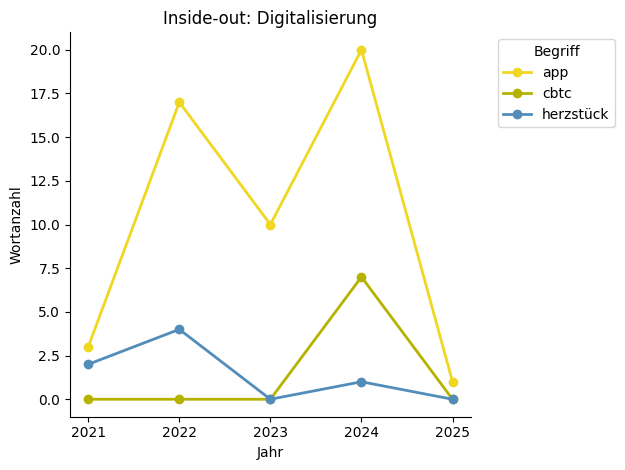

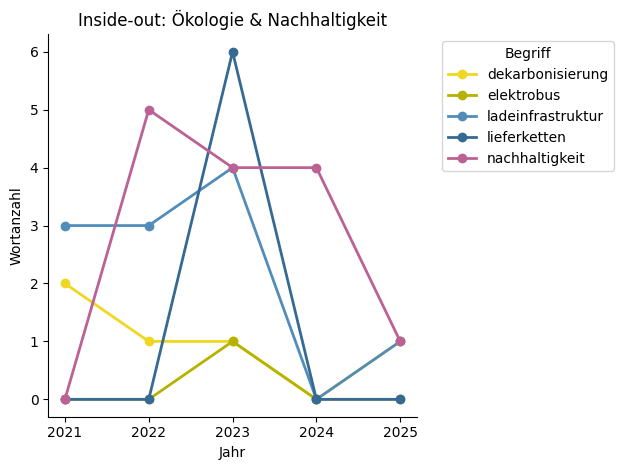

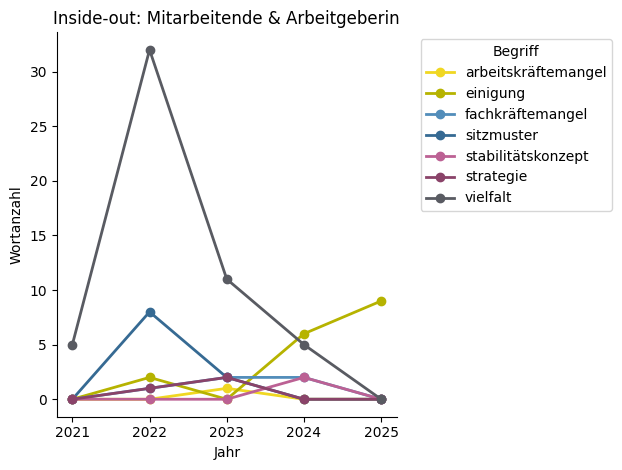

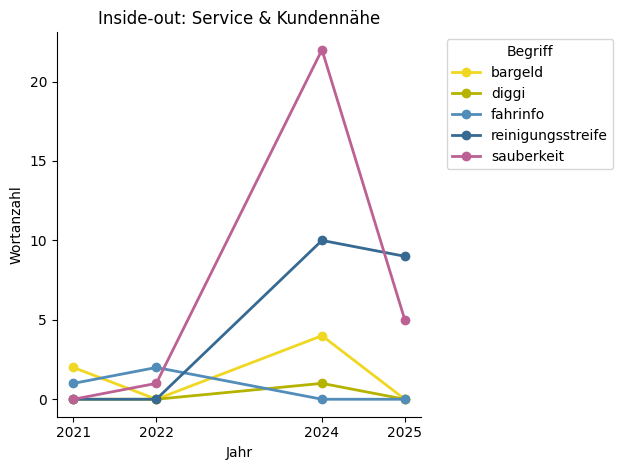

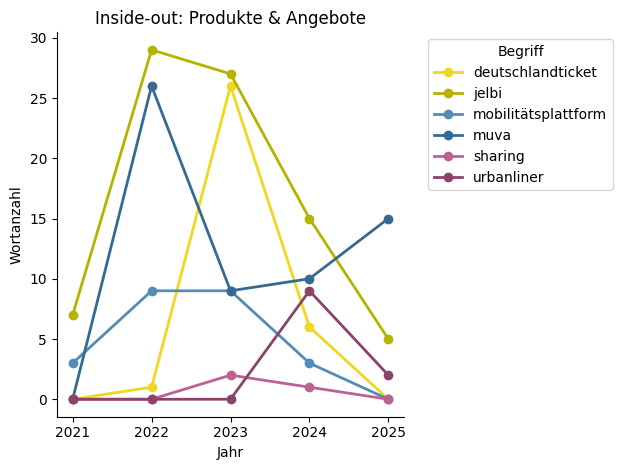

In [104]:
# Entwicklung: Clustertrends über die Jahre 
# Plott: Ausgewählte Wörter, gruppiert nach Jahr und Cluster (ausgelagerte Funktion)
cluster_trend_plot(df_bvg_clean, clusters_insideout, label="Inside-out")